In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [198]:
df = pd.read_csv("autoMPG_data.csv",decimal=',')
x = df.iloc[:, [4]]
y = df.iloc[:, [5]]
x
y
x['Displacement100ci'].fillna(0)
y['Horsepower100'].fillna(0)

train1 = df.iloc[:, [0]]
train2 = df.iloc[:, [3]]

train1['GallonsPer100Miles'].fillna(0)
train2['Cylinders'].fillna(0)


##muuta oikeaksi dataksi

0      8
1      8
2      8
3      8
4      8
      ..
387    4
388    4
389    4
390    4
391    4
Name: Cylinders, Length: 392, dtype: int64

In [199]:
model = LinearRegression().fit(train1,train2)

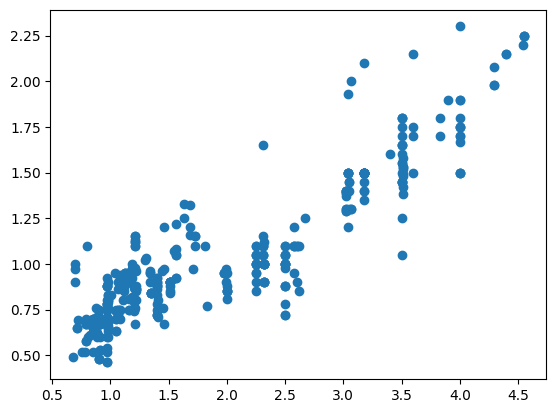

In [200]:
plt.scatter(x,y)

In [201]:
model.coef_

array([[0.85876899]])

In [202]:
model.intercept_

array([1.36299205])

In [203]:
model.score(train1,train2)*100

70.57189183707034